In [4]:
library(dplyr) # easier data wrangling 
library(viridis) # colour blind friendly palette, works in B&W also
library(Interpol.T) #  will generate a large dataset on initial load
library(lubridate) # for easy date manipulation
library(ggExtra) # because remembering ggplot theme options is beyond me
library(tidyr) 
library(plotly)
library(hrbrthemes)
library(ggplot2)
library(readxl)
library(pheatmap)
library(reshape2)
library(RColorBrewer)
library(Cairo)


# set current path as working directory
setwd("../Subjective_View_Setting")
options (warn = -1)

In [5]:
asset <- read.table('SV_Asset.csv',header=T,sep=",",fileEncoding="UTF-8")
colnames(asset) <- c("Date","SV","Market")
asset$Date <- as.Date(asset$Date)

asset <- melt(asset,id.vars = 1)
colnames(asset) <- c("Date","Model","Value")

png 
  2

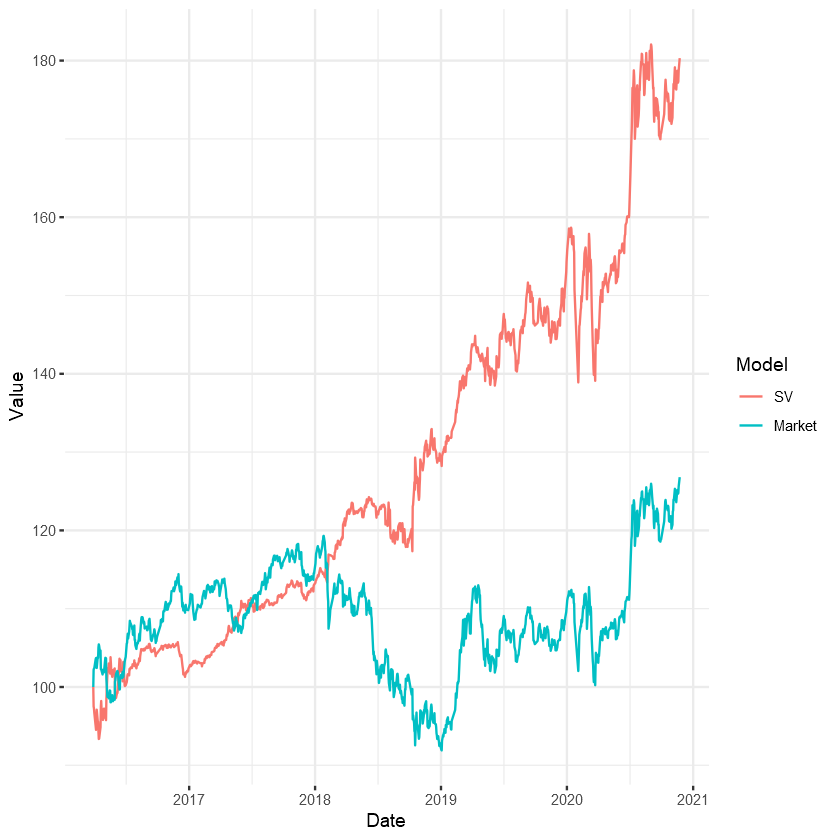

In [6]:
CairoPDF('SV_Asset.pdf', width= 9, height = 4)
ggplot() +
    geom_line(data = asset, aes(x=Date, y=Value,color=Model),) +
    theme_ipsum() + theme_bw() + theme(legend.position="right") +
    theme(panel.border = element_blank(),
          axis.line = element_line(colour = "white")) +
    theme(plot.title = element_text(size=10))
dev.off()

In [7]:
# load data
df <- read.table('Subjective_View.csv',  sep=",",header=1,fileEncoding="UTF-8")
df <- df[,c(-17)]

colnames(df) <- c("Date",colnames(df)[2:length(colnames(df))])
df$Date <- ymd(df$Date)

# melt
df <- melt(df,id.vars = 1)
colnames(df) <- c("Date","Asset","Value")
df$Asset <- as.factor(df$Asset)


df <- df %>% mutate(year = year(Date),
                  month = month(Date, label=TRUE),
                  day = day(Date))

# fill missing value
df <-df %>% select(day,Asset,month,year,Value)%>%
        fill(Value) 

png 
  2

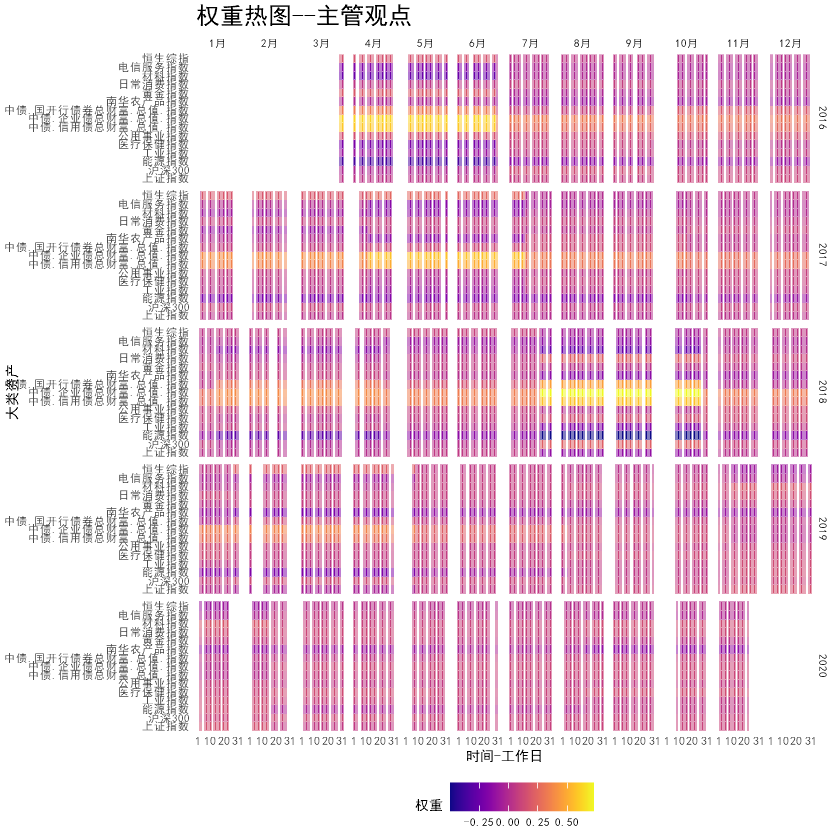

In [8]:
######## Plotting starts here#####################
options(warn=-1)
CairoPDF("Heatmap_SV_TS_Weights.pdf",width = 12,height = 11)
ggplot(df,aes(day,Asset,fill=Value))+
    geom_tile(color= "white",size=0.1) + 
    scale_fill_viridis(name="权重",option ="C") +
    facet_grid(year~month) + 
    labs(title= "权重热图--主观观点", x="时间-工作日", y="大类资产") +
    scale_y_discrete( breaks = unique(df$Asset)) +
    scale_x_continuous(breaks =c(1,10,20,31)) +
    theme_minimal(base_size = 8) + 
    theme(legend.position = "bottom")+
    theme(text=element_text(family="SimHei")) +
    theme(plot.title=element_text(size = 14))+
    theme(axis.text.y=element_text(size=6)) +
    theme(plot.title=element_text(size = 14))+
    theme(axis.text.y=element_text(size=6)) +
    theme(plot.title=element_text(size = 14))+
    theme(axis.text.y=element_text(size=6)) +
    theme(strip.background = element_rect(colour="white"))+
    theme(plot.title=element_text(hjust=0))+
    theme(axis.ticks=element_blank())+
    theme(axis.text=element_text(size=7))+
    theme(legend.title=element_text(size=8))+
    theme(legend.text=element_text(size=6))+
    removeGrid()
dev.off()